In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/code/PhasorNetworks.jl`


In [14]:
using Random: Xoshiro
using Lux

In [3]:
include("../src/PhasorNetworks.jl")

Main.PhasorNetworks

In [ ]:
using .PhasorNetworks

In [5]:
res = -1.0:0.01:1.0
ims = -1.0:0.01:1.0

-1.0:0.01:1.0

In [6]:
vals = [r + 1.0im * i for r in res, i in ims];

In [7]:
size(vals)

(201, 201)

In [8]:
angs = angle.(vals);

In [9]:
using Plots

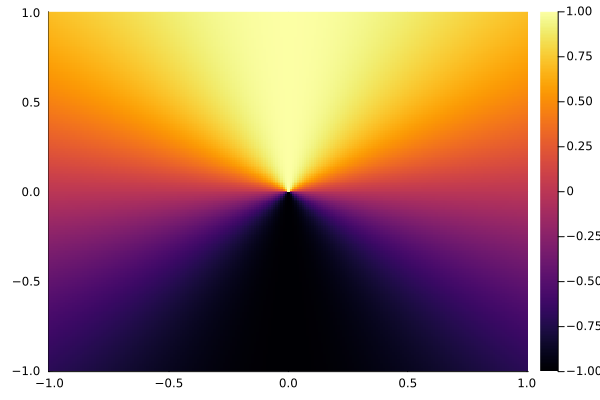

In [10]:
heatmap(res, ims, cos.(angs))

In [11]:
x1 = reshape(collect(-1.0f0:0.01f0:1.0f0), (1, :))

1×201 Matrix{Float32}:
 -1.0  -0.99  -0.98  -0.97  -0.96  …  0.95  0.96  0.97  0.98  0.99  1.0

In [28]:
l1 = PhasorDense(1 => 1, identity, init_weight = variance_scaling)

PhasorDense(
    dense = Dense(1 => 1, use_bias=false),  # 1 parameters
    bias = ComplexBias((1,)),           # 2 parameters
)         # Total: 3 parameters,
          #        plus 0 states.

In [29]:
rng = Xoshiro(42)
ps, st = Lux.setup(rng, l1)

((dense = (weight = Float32[0.7309604;;],), bias = (bias_real = Float32[1.0], bias_imag = Float32[0.0])), (dense = NamedTuple(), bias = NamedTuple()))

In [30]:
o1, _ = l1(x1, ps, st)

(ComplexF32[0.26903957f0 + 6.390259f-8im 0.2694003f0 - 0.022959966f0im … 0.2694003f0 + 0.022959966f0im 0.26903957f0 - 6.390259f-8im], (dense_real = NamedTuple(), dense_imag = NamedTuple()))

In [31]:
ps

(dense = (weight = Float32[0.7309604;;],), bias = (bias_real = Float32[1.0], bias_imag = Float32[0.0]))

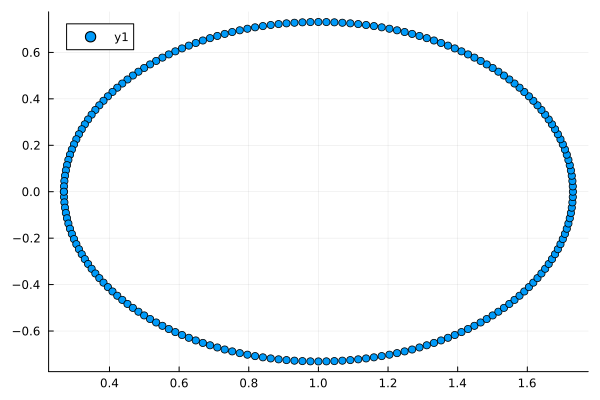

In [32]:
scatter(real.(vec(o1)), imag.(vec(o1)))

In [19]:
y1 = soft_angle(o1);

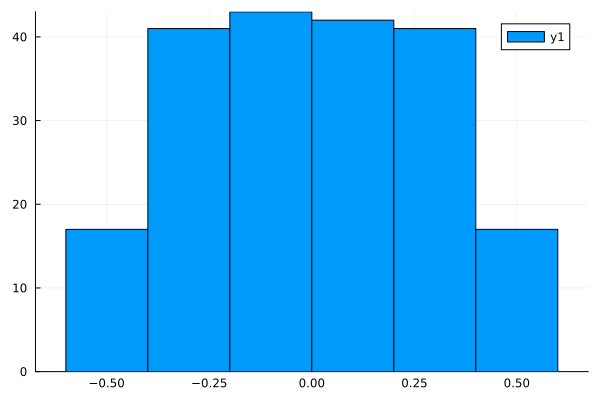

In [21]:
histogram(vec(y1))

In [15]:
function soft_angle(x::AbstractArray{<:Complex}, r_lo::Real = 0.1, r_hi::Real = 0.2)
    r = abs.(x)
    m = (r .- r_lo) ./ (r_hi - r_lo)
    s = sigmoid_fast(3 .* m .- (r_hi - r_lo))

    return s .* angle.(x) / pi
end

soft_angle (generic function with 6 methods)

In [16]:
s_angs = soft_angle(vals, 0.1, 0.2);

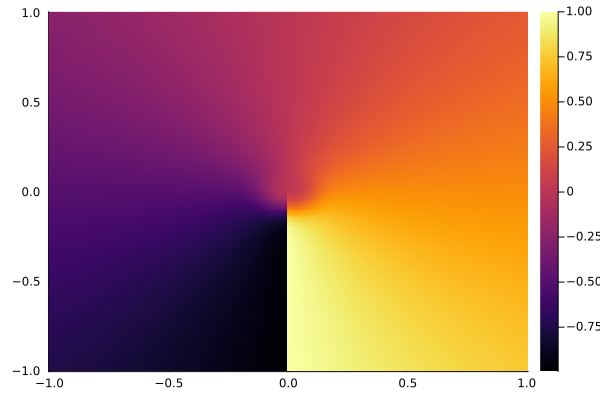

In [17]:
heatmap(res, ims, s_angs)

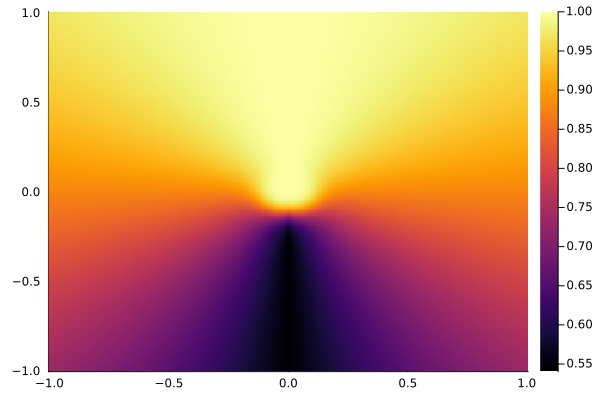

In [18]:
heatmap(res, ims, cos.(s_angs))

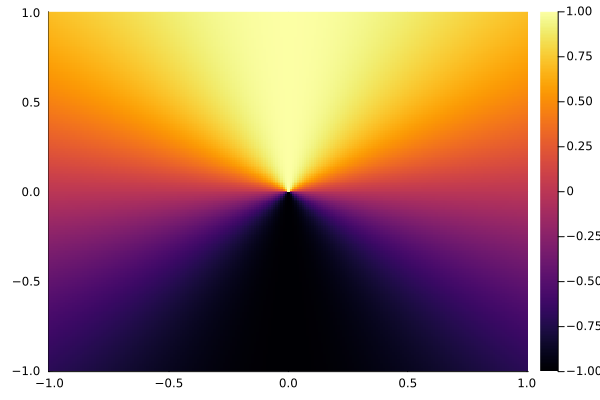

In [19]:
heatmap(res, ims, cos.(angs))